In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import itertools 
import os,shutil,random

%matplotlib inline


In [10]:
physical_devices=tf.config.experimental.list_physical_devices('GPU')

In [12]:
print("num of GPU available",len(physical_devices))

num of GPU available 1


In [14]:
mobile=tf.keras.applications.mobilenet.MobileNet()

17227776/17225924 [==============================] - 47s 3us/step


In [15]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [25]:
def prepare_image(file):
    img_path='c:/Users/princ/Mask Detector/dataset/train/with_mask/'
    img=image.load_img(img_path+file,target_size=(224,224))
    img_array=image.img_to_array(img)
    img_array_expanded_dims=np.expand_dims(img_array,axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

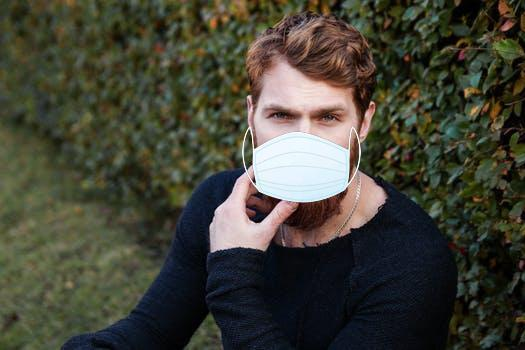

In [41]:
from IPython.display import Image
Image(filename='c:/Users/princ/Mask Detector/dataset/train/with_mask/0-with-mask.jpg',width=300,height=200)

In [28]:
preprocess_image=prepare_image('0-with-mask.jpg')

In [ ]:
predictions=mobile.predict(preprocess_image)

In [34]:
results=imagenet_utils.decode_predictions(predictions)
results

[[('n03814639', 'neck_brace', 0.5806981),
  ('n03424325', 'gasmask', 0.37781444),
  ('n03825788', 'nipple', 0.0031770233),
  ('n04325704', 'stole', 0.0031416633),
  ('n04074963', 'remote_control', 0.0029526085)]]

In [36]:
assert results[0][0][1]=='neck_brace'

In [37]:
preprocess_image=prepare_image('2-with-mask.jpg')

In [38]:
predictions=mobile.predict(preprocess_image)

In [39]:
results=imagenet_utils.decode_predictions(predictions)
results

[[('n03424325', 'gasmask', 0.27020374),
  ('n03803284', 'muzzle', 0.213057),
  ('n03724870', 'mask', 0.12663421),
  ('n03794056', 'mousetrap', 0.050435685),
  ('n03376595', 'folding_chair', 0.020855317)]]

# Sign Languages classification

In [43]:
#organize the dataset
os.chdir('Dataset')

In [44]:
if os.path.isdir('train/0') is False:
    os.mkdir('train')
    os.mkdir('test')
    os.mkdir('valid')
    
    for i in range(0,10):
        shutil.move(f'{i}','train')
        os.mkdir(f'valid/{i}')
        os.mkdir(f'test/{i}')
        
        valid_samples=random.sample(os.listdir(f'train/{i}'),30)
        for j in valid_samples:
            shutil.move(f'train/{i}/{j}',f'valid/{i}')
        test_samples=random.sample(os.listdir(f'train/{i}'),5)
        for k in test_samples:
            shutil.move(f'train/{i}/{k}',f'test/{i}')
os.chdir('../..')                

In [48]:
os.chdir('c:/Users/princ/Neural Network Tutorials')
train_path = 'Dataset/train'
valid_path = 'Dataset/valid'
test_path = 'Dataset/test'

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [49]:
mobile = tf.keras.applications.mobilenet.MobileNet()
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [50]:
x = mobile.layers[-6].output

In [51]:
output = Dense(units=10, activation='softmax')(x)

In [52]:
model = Model(inputs=mobile.input, outputs=output)

In [53]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [54]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128   

In [55]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [56]:
model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=30,
          verbose=2
)

Train for 172 steps, validate for 30 steps
Epoch 1/30
172/172 - 48s - loss: 0.8152 - accuracy: 0.7512 - val_loss: 0.9322 - val_accuracy: 0.7767
Epoch 2/30
172/172 - 36s - loss: 0.1200 - accuracy: 0.9889 - val_loss: 0.7437 - val_accuracy: 0.8233
Epoch 3/30
172/172 - 38s - loss: 0.0435 - accuracy: 0.9988 - val_loss: 0.6829 - val_accuracy: 0.8300
Epoch 4/30
172/172 - 37s - loss: 0.0224 - accuracy: 1.0000 - val_loss: 0.6027 - val_accuracy: 0.8633
Epoch 5/30
172/172 - 37s - loss: 0.0146 - accuracy: 1.0000 - val_loss: 0.5636 - val_accuracy: 0.8700
Epoch 6/30
172/172 - 38s - loss: 0.0105 - accuracy: 1.0000 - val_loss: 0.5212 - val_accuracy: 0.8867
Epoch 7/30
172/172 - 37s - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.4997 - val_accuracy: 0.8867
Epoch 8/30
172/172 - 37s - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.4746 - val_accuracy: 0.8967
Epoch 9/30
172/172 - 35s - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.4608 - val_accuracy: 0.8967
Epoch 10/30
172/172 - 37s - loss: 0.0040 - accur

In [57]:
test_labels = test_batches.classes

In [58]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [59]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

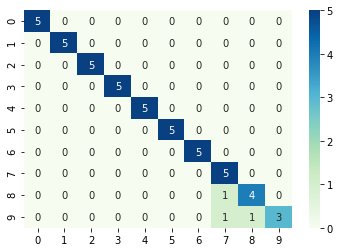

In [60]:
sns.heatmap(cm,annot=True,fmt='d',cmap='GnBu')